# <center> Scientific Programming with Python
## <center> Final assignment: Life Expectancy

**Author:** Patrick Metz (pmetz2s; 9033945)  
**Date:** June 28th, 2021

### Task 1
**Goal**: use Pandas to import life expectancy data<sup>1</sup> from a given csv 
file into a dataframe, while removing incomplete rows. 

The data spans most years from 1960 to 2018; data sets of the years from 1970 to 1975 and
from 1995 to 1999 are missing. Year columns have data type *float* and the remaining
columns possess *string* type. 

|Country Name|Country Code|Region|Income Group|1960|1961|...|1969|1976|...|1994|2000|...|2018|
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
|Country 1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country 2|...|...|...|...|...|...|...|...|...|...|...|...|...|
|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|
|Country n-1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country n|...|...|...|...|...|...|...|...|...|...|...|...|...|

**Reference**: 1) Life expectancy at birth, total (years) | Data (2021). Available online 
at https://data.worldbank.org/indicator/SP.DYN.LE00.IN, checked on 6/1/2021.

In [168]:
import math, warnings

import matplotlib.pyplot as plt, numpy as np, pandas as pd

data_frame = pd.read_csv(
    "life_expectancy_numpy_scipy.csv").dropna()  # only read complete data

### Task 2
**Goal**: Fit a polynomial of the 6th degree to the life expectancy, of a sample of five 
randomly chosen countries, via Numpy. Then accordingly plot five graphs where the fitted 
polynomial and the original life expectancy data are overlain.

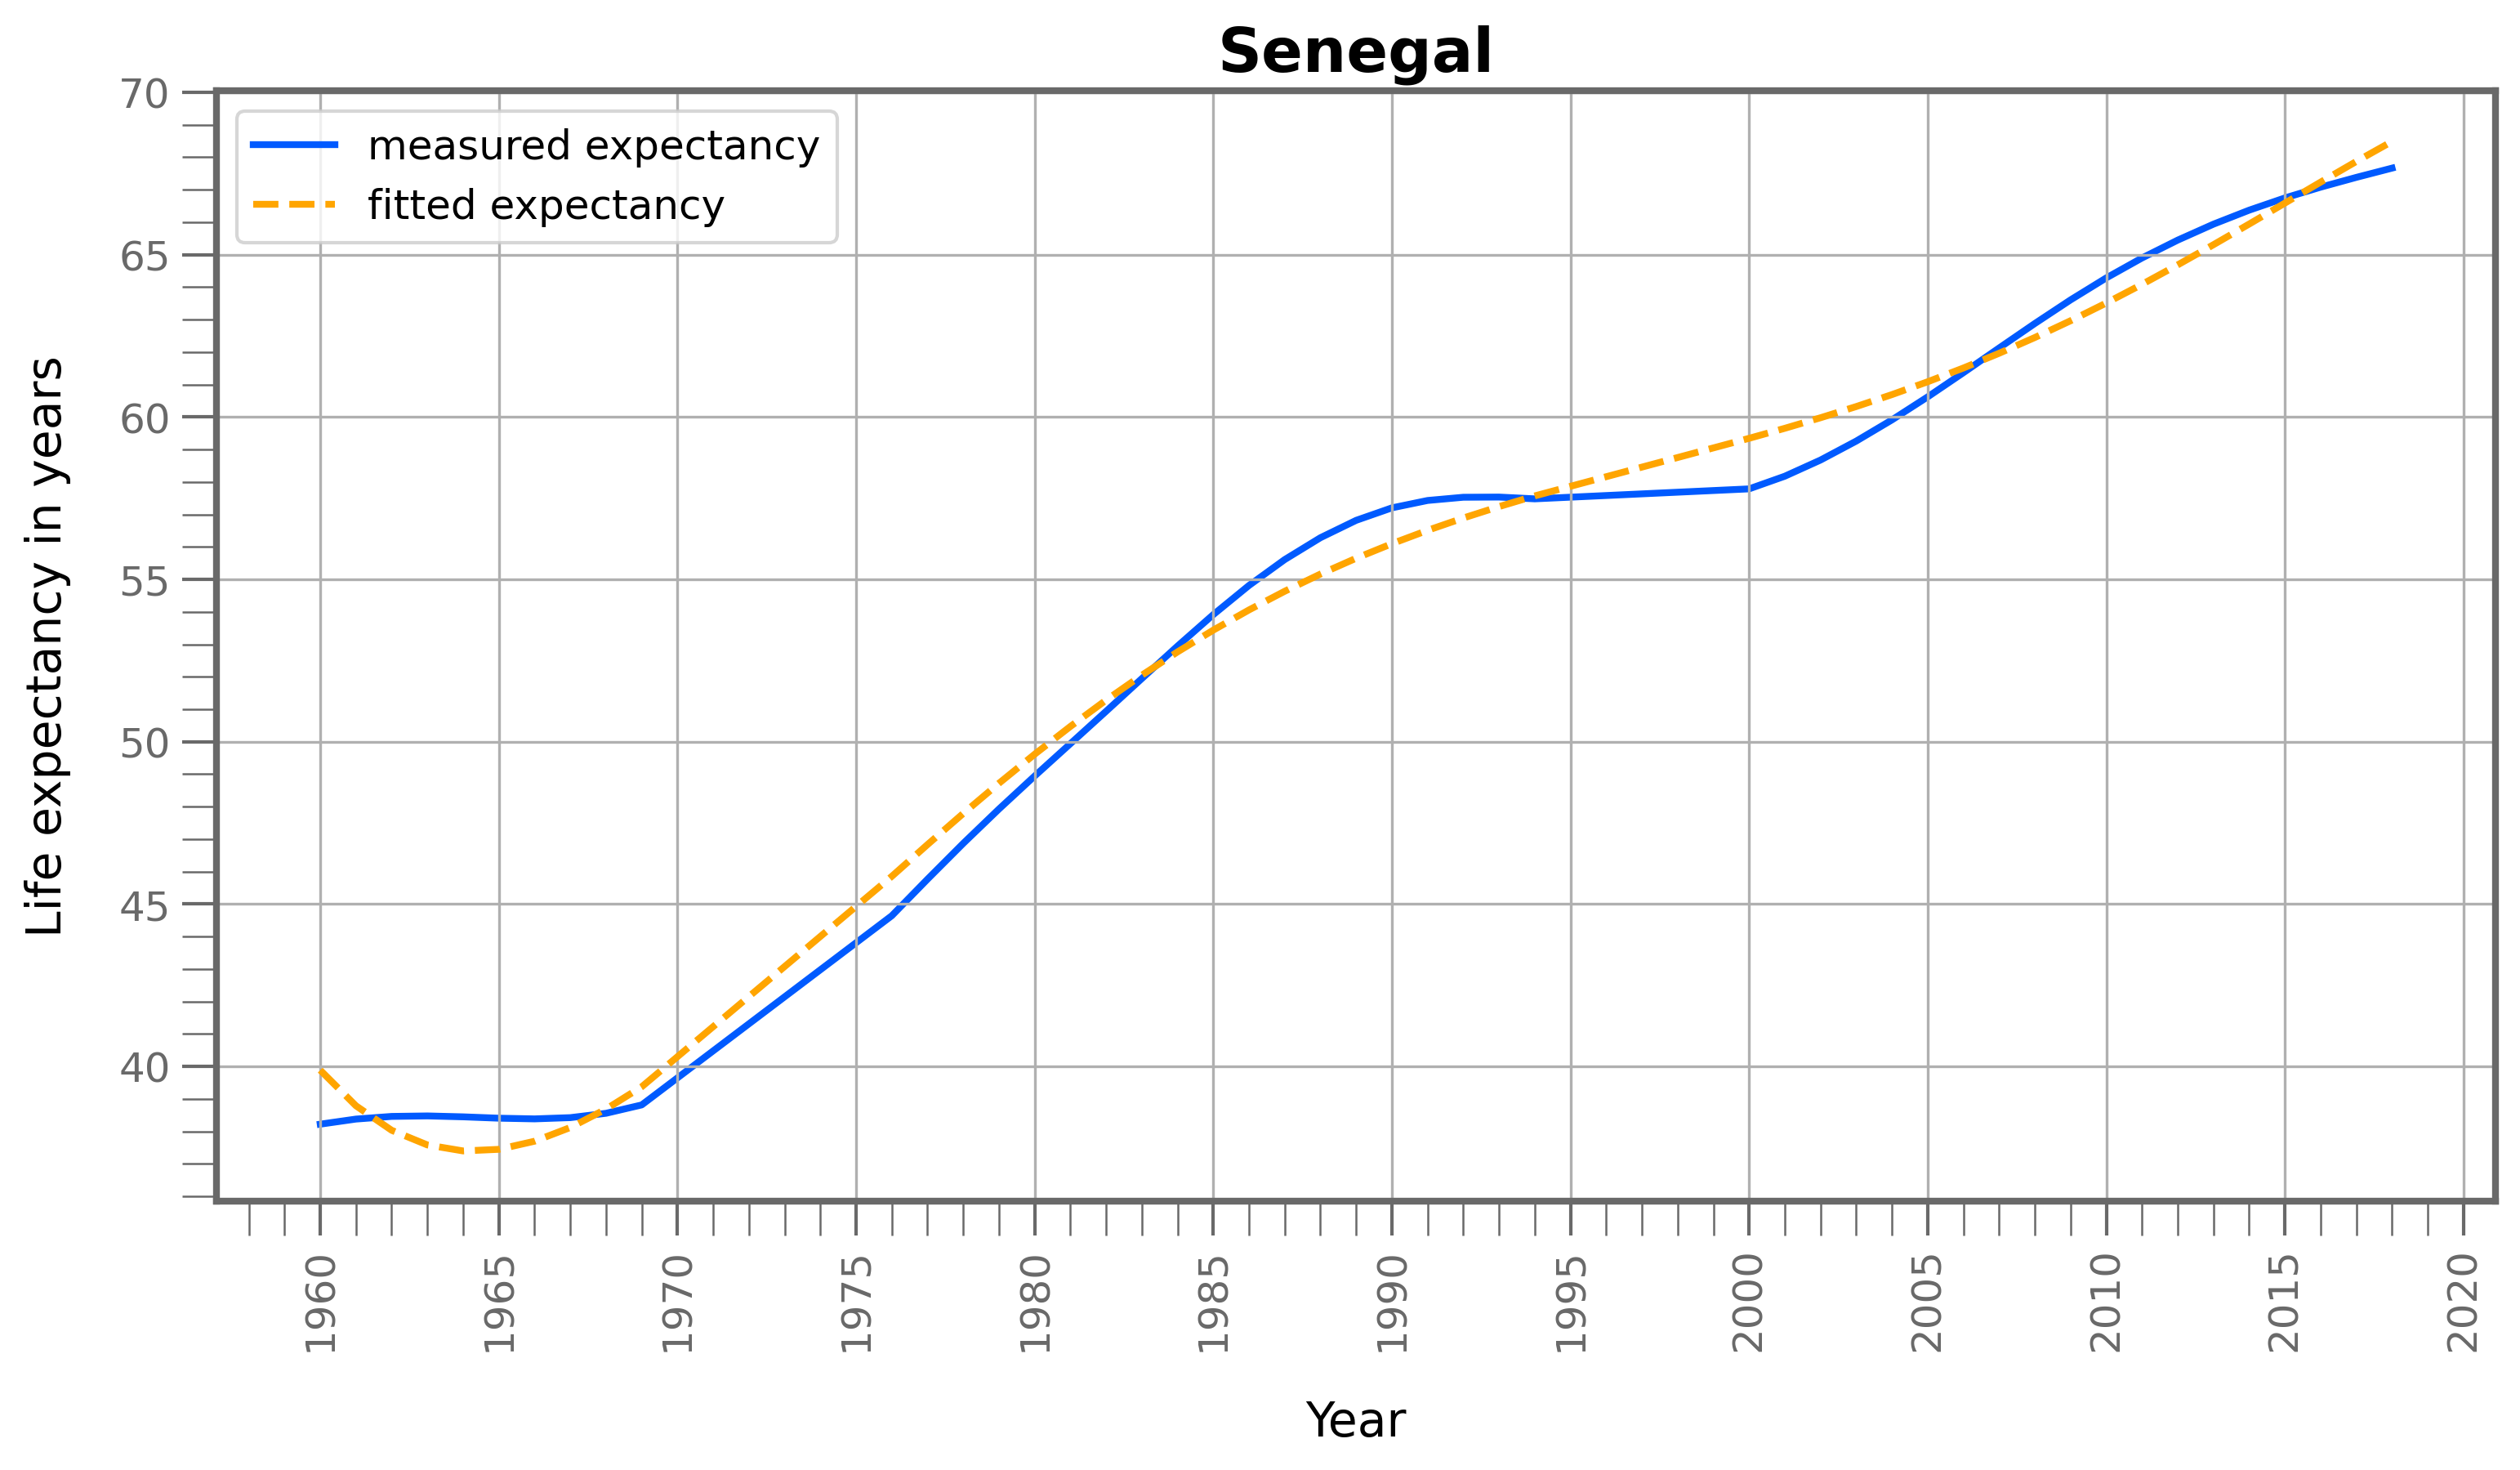

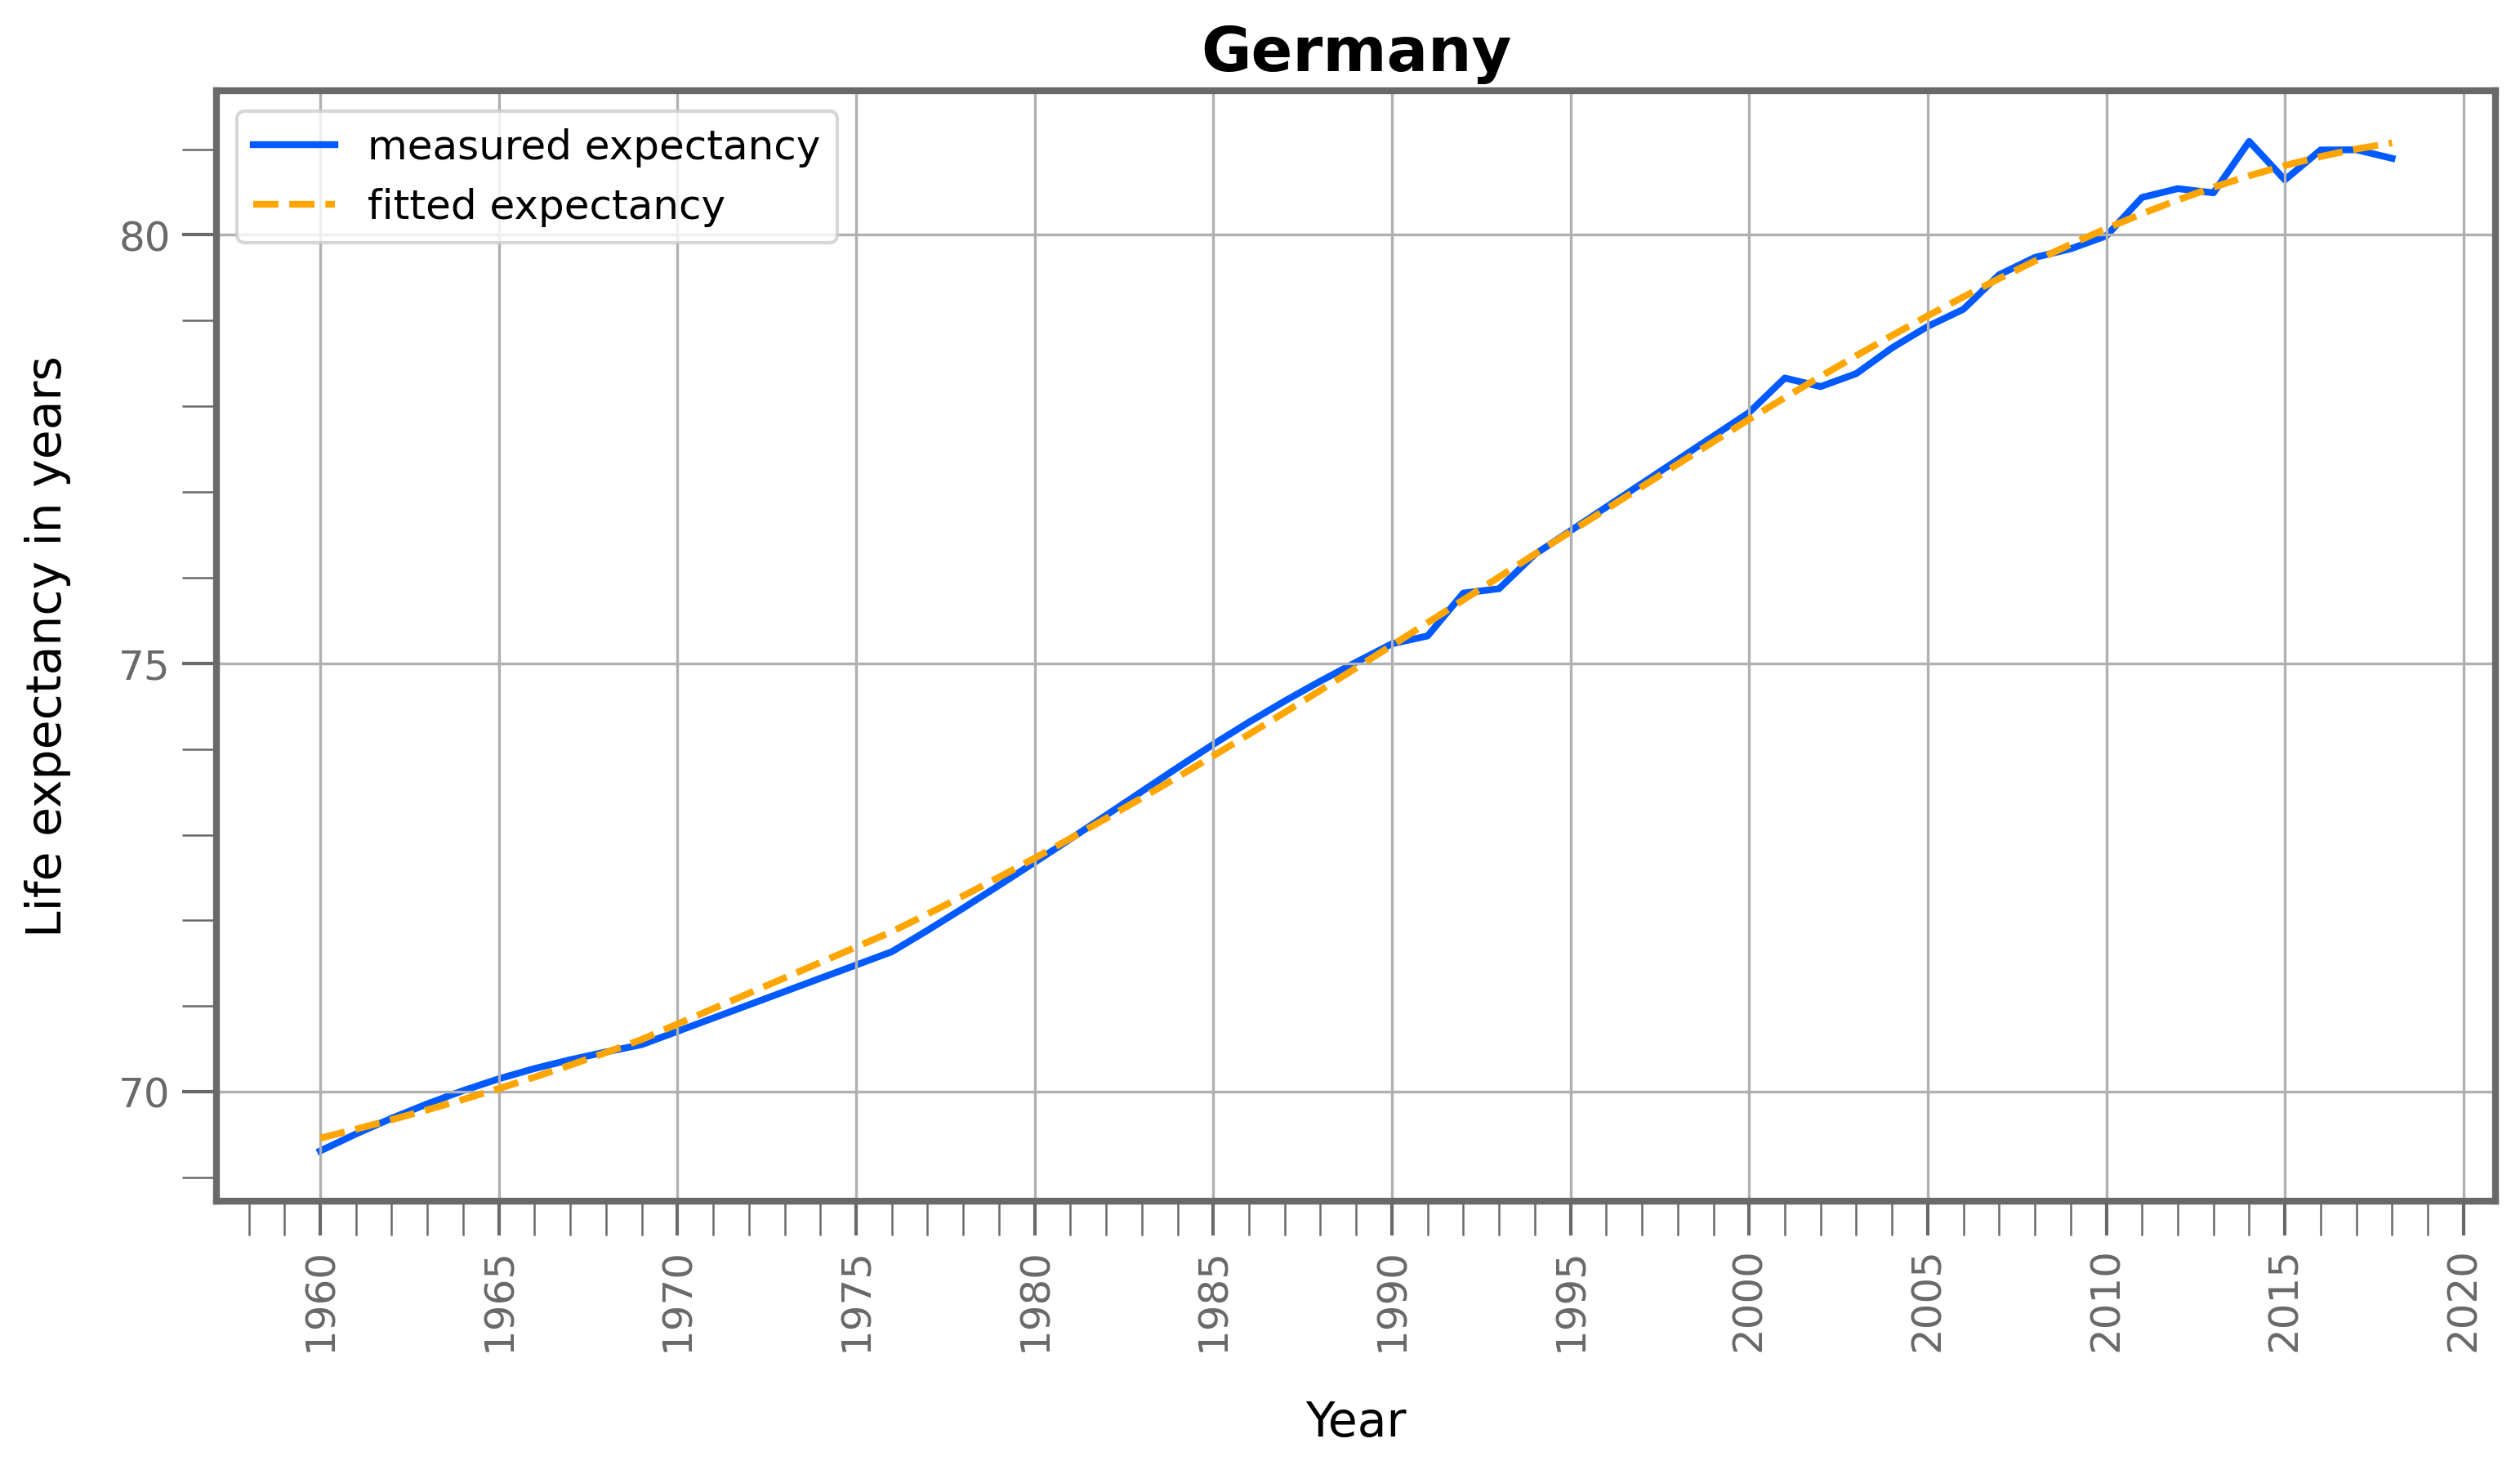

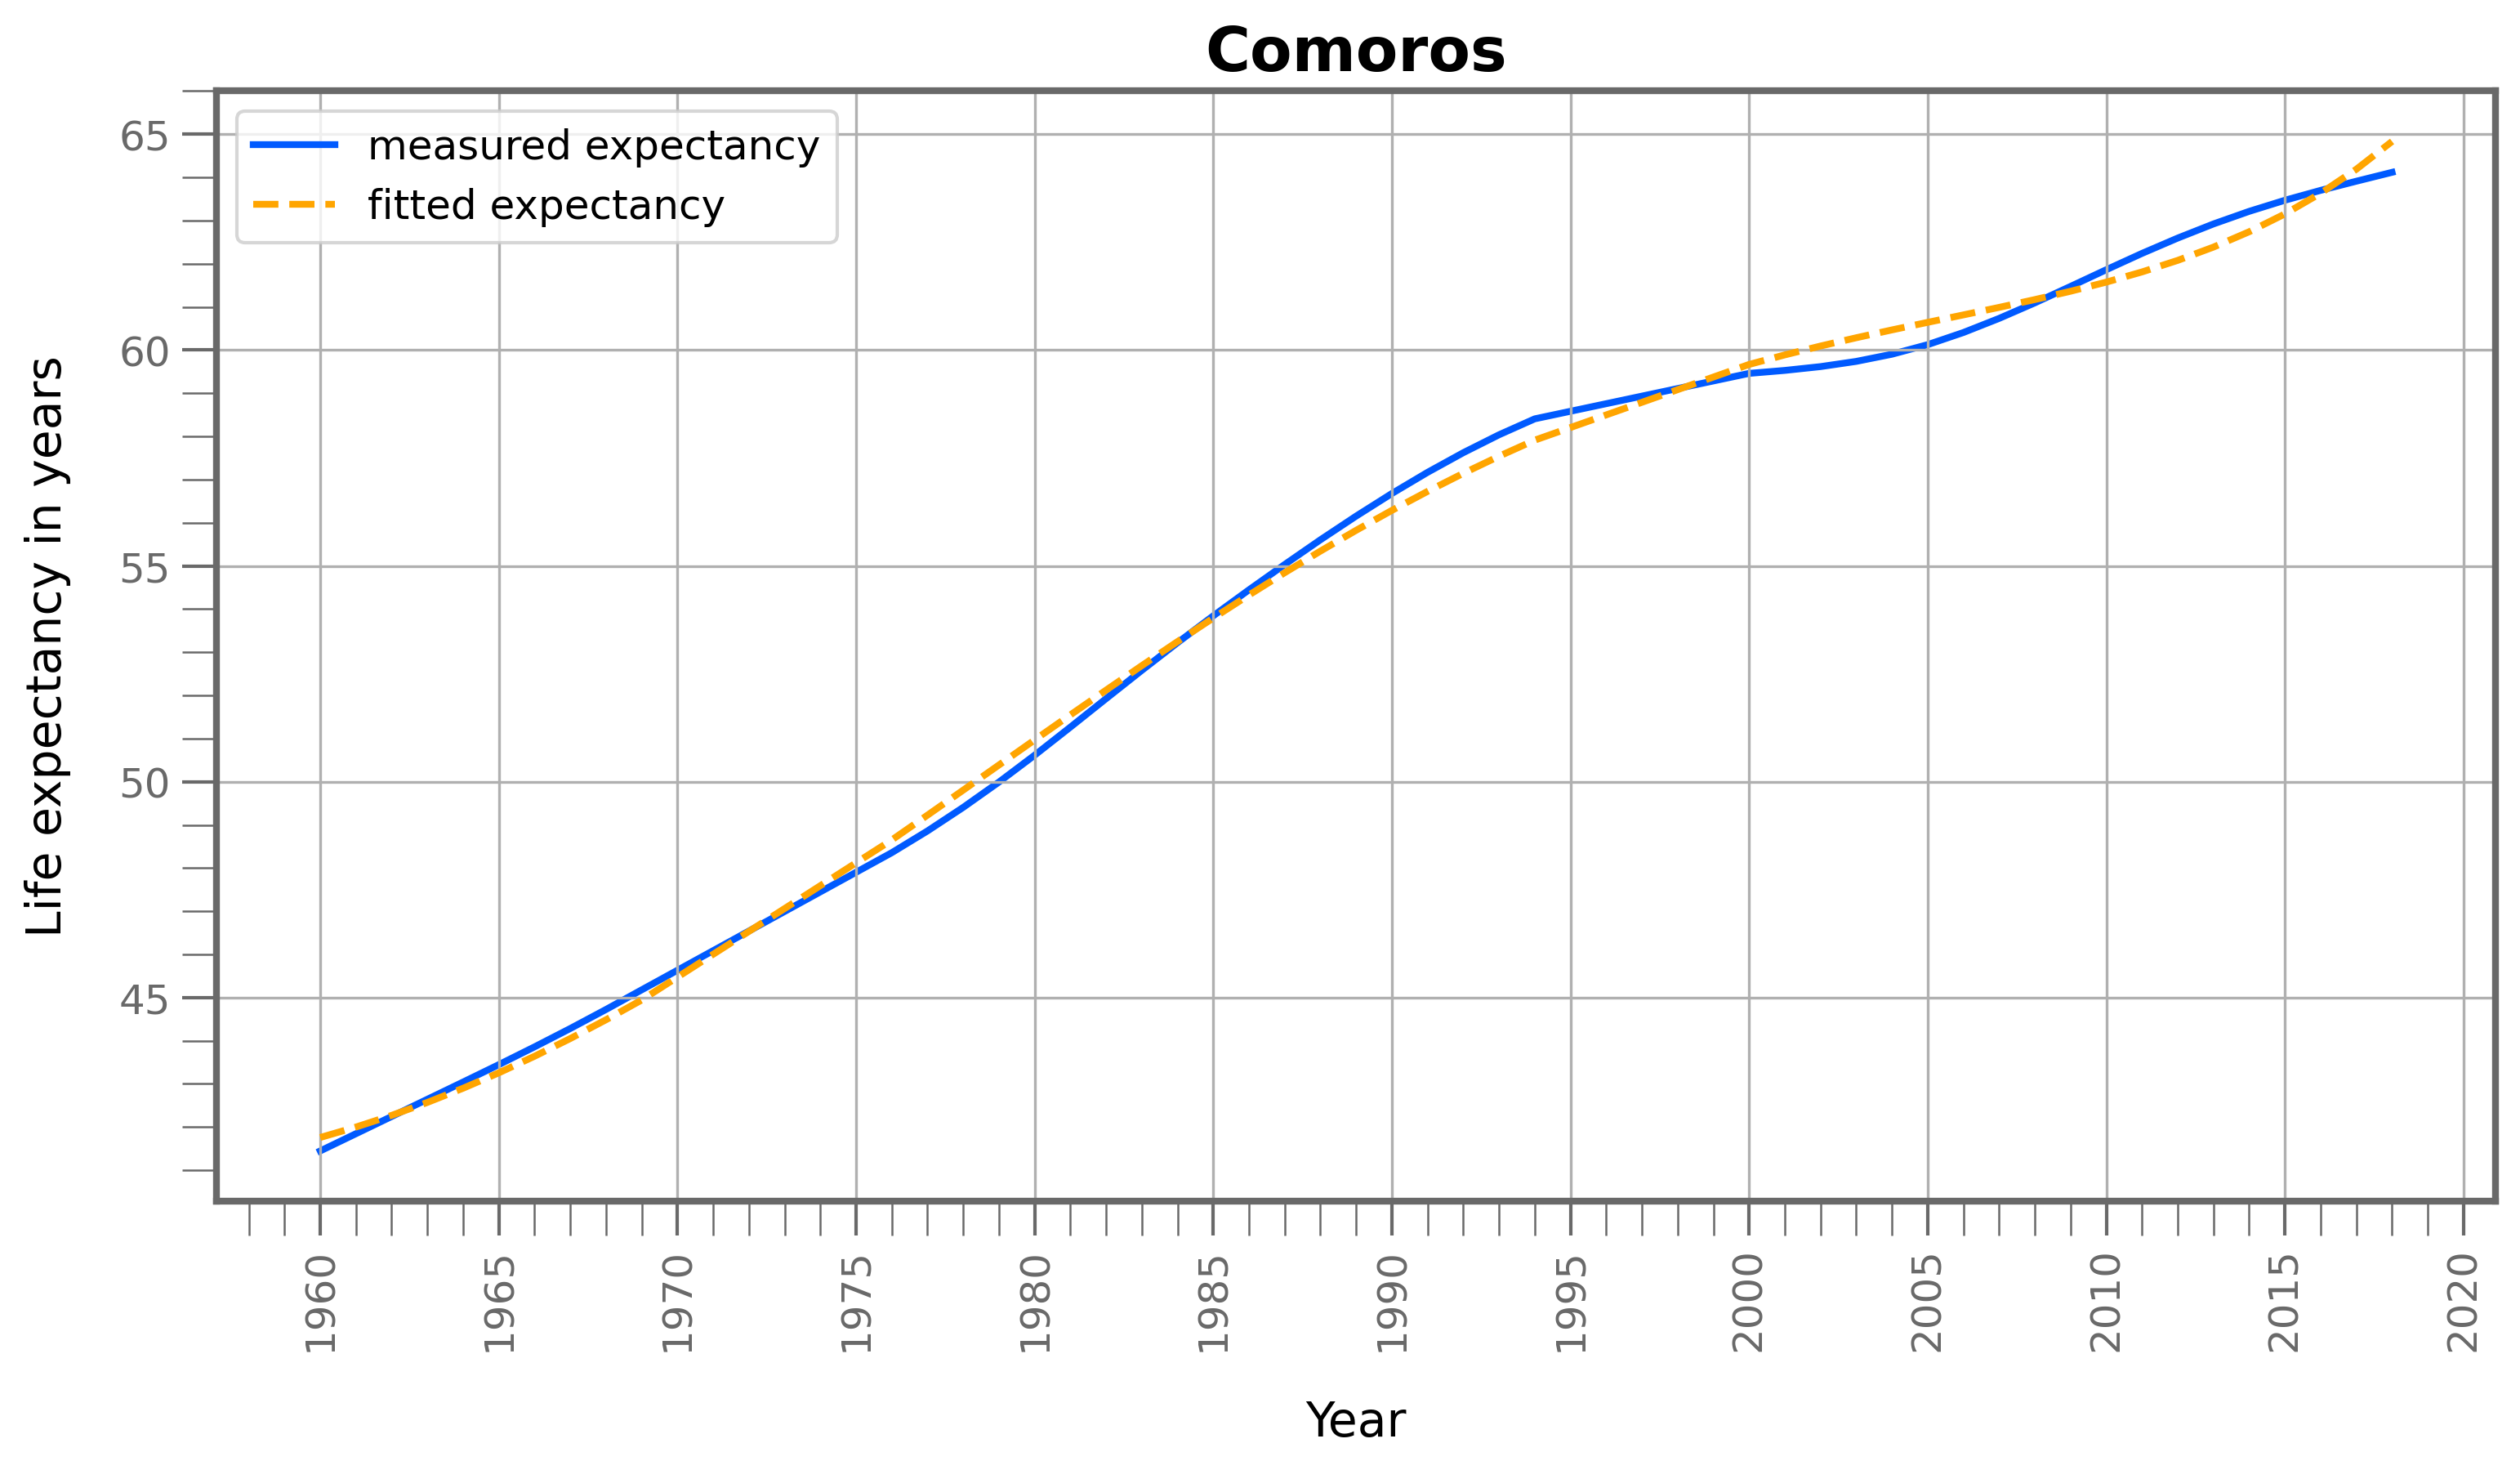

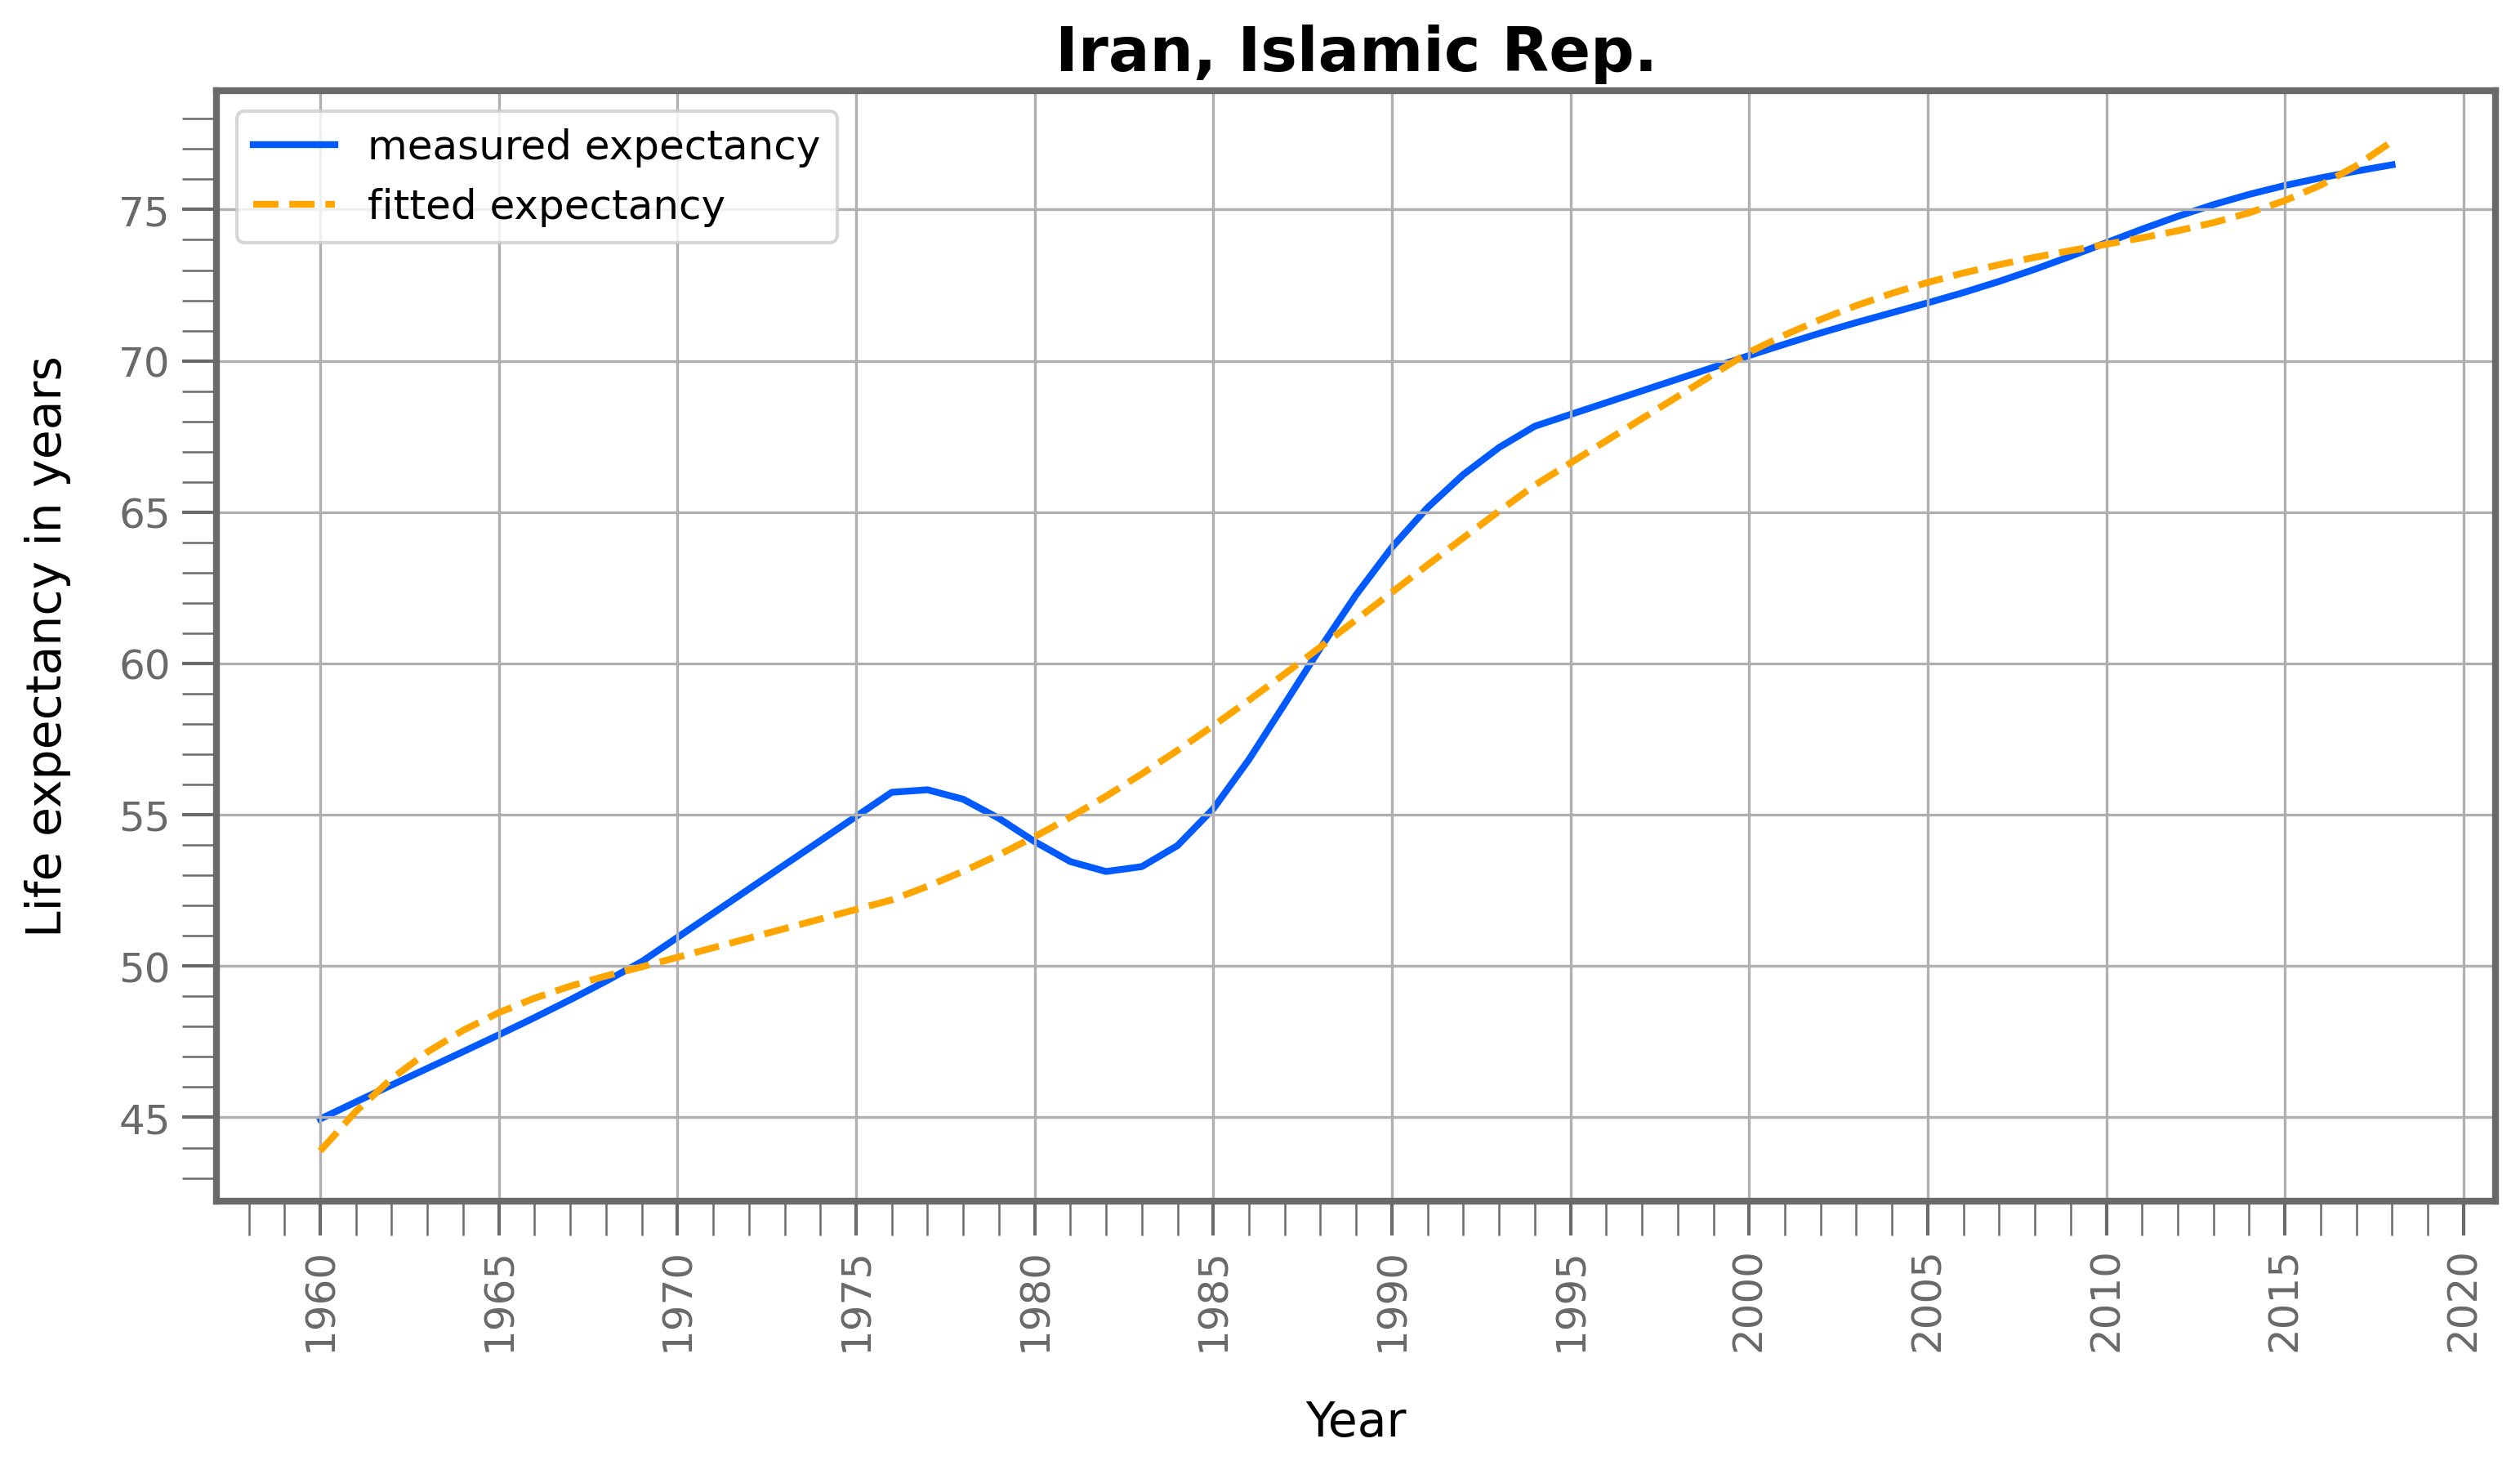

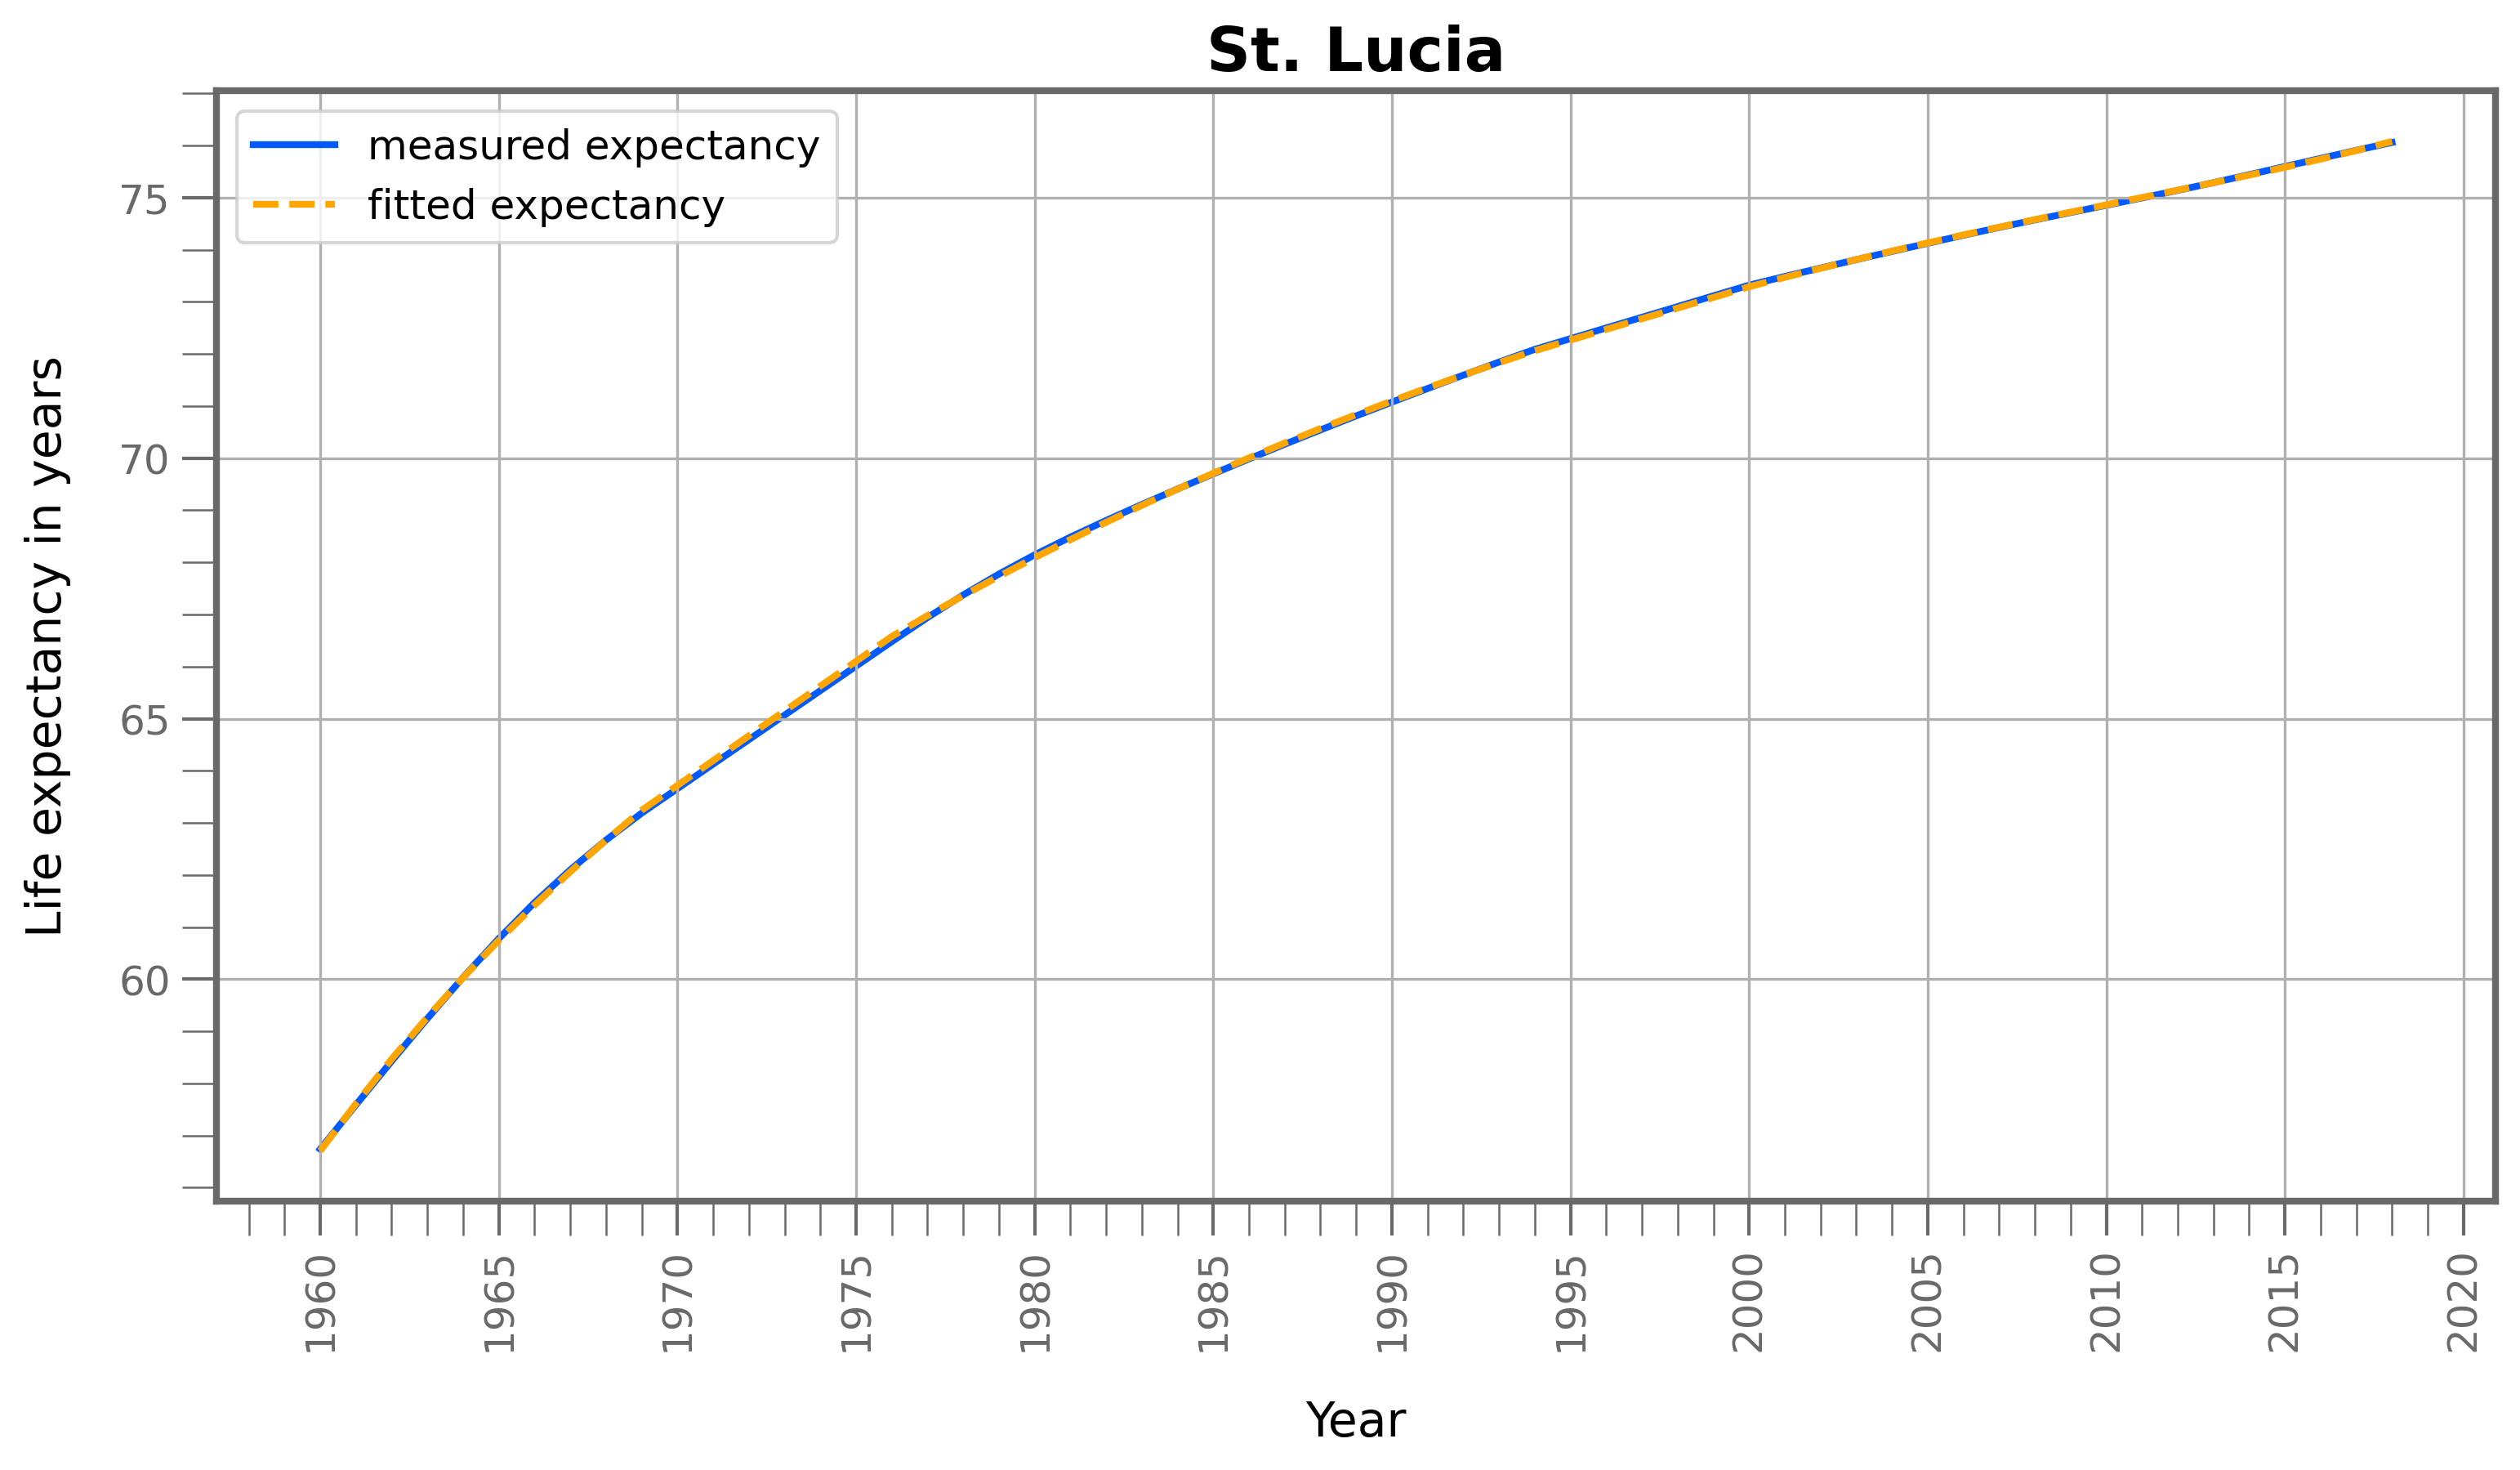

In [214]:
def countries_to_years_and_expectancies(countries: pd.DataFrame):
    years_and_expectancies = []

    # omits years 1970 to 1975 and 1995 to 1999
    years = list(range(1960, 1970)) + list(range(1976, 1995)) + list(range(2000, 2019))
    x = np.array(years)

    for index in range(len(countries)):
        country = countries.iloc[index]
        expectancies = country.loc["1960":].values.tolist()  # values from 1960 onwards

        years_and_expectancies.append((years, expectancies))

    return years_and_expectancies


def plot_fitted_and_unfitted_expectancies(country, years, expectancies,
                                          fitted_expectancies):
    plt.rc('axes', edgecolor="dimgrey", linewidth=2)
    plt.figure(dpi=300, figsize=(12, 6))
    plt.grid(True)

    plt.title(country, fontsize=18, fontweight='bold')
    plt.xlabel("Year", fontsize=14, labelpad=14)
    plt.ylabel("Life expectancy in years", fontsize=14, labelpad=14)

    plt.tick_params(axis='both', colors='dimgray', labelsize=12, length=10, width=1)
    plt.xticks(np.arange(min(years), max(years) + 5, 5), rotation='90')
    plt.yticks(np.arange(0, 100, 5))

    plt.minorticks_on()
    plt.tick_params(which='minor', length=10, color='dimgray')

    plt.plot(years, expectancies, color="#005aff", label="measured expectancy",
             linewidth=2, zorder=1)
    plt.plot(years, fitted_expectancies, color="#ffa500", label="fitted expectancy",
             linewidth=2, linestyle="dashed", zorder=2)

    plt.legend(loc='upper left', fontsize=12)

    plt.show()


random_countries = data_frame.sample(5)
years_and_expectancies = countries_to_years_and_expectancies(random_countries)
fitted_expectancies = []

warnings.simplefilter('ignore', np.RankWarning)  # suppress warnings for fit quality

for (years, expectancies) in years_and_expectancies:
    sixth_degree_coefficients = np.polyfit(years, expectancies, 6)
    sixth_degree_polynomial = np.poly1d(sixth_degree_coefficients)

    fitted_expectancies.append(sixth_degree_polynomial(years))

for index in range(len(random_countries)):
    plot_fitted_and_unfitted_expectancies(
        random_countries.iloc[index].loc["Country_Name"],  # country name
        years_and_expectancies[index][0],  # years
        years_and_expectancies[index][1],  # expectancies
        fitted_expectancies[index]  # fitted expectancies
    )
    